# Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# Reading the file

In [2]:
df = pd.read_csv("C:\\Users\\lavanya\\Downloads\\81 column dataset.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Performing EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df = df.drop("Id",axis=1)

In [6]:
df.shape

(1460, 80)

In [7]:
df_n = df.select_dtypes(include=['number'])
df_n

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [8]:
df_c = df.select_dtypes(include=['object'])
df_c

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [9]:
df_n.isnull().sum()


MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [10]:
m_l = df_n["LotFrontage"].median()
df_n["LotFrontage"] = df_n["LotFrontage"].fillna(m_l)
m_m = df_n["MasVnrArea"].median()
df_n["MasVnrArea"] = df_n["MasVnrArea"].fillna(m_m)
df_n["MasVnrArea"].isnull().sum()

0

In [11]:
m_g = df_n["GarageYrBlt"].median()
df_n["GarageYrBlt"] = df_n["GarageYrBlt"].fillna(m_g)
df_n["GarageYrBlt"].isnull().sum()

0

In [12]:
df_n.isnull().sum().sum()

0

In [13]:
df_c.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [14]:
df_c.columns[df_c.isnull().any()]

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')

In [15]:
modes = df_c.mode().iloc[0]
df_c = df_c.fillna(modes)
df_c

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
2,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
3,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Abnorml
4,RL,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1456,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1457,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,Gd,GdPrv,Shed,WD,Normal
1458,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal


In [16]:
df_c.isnull().sum().sum()

0

# Checking for outliers using boxplot

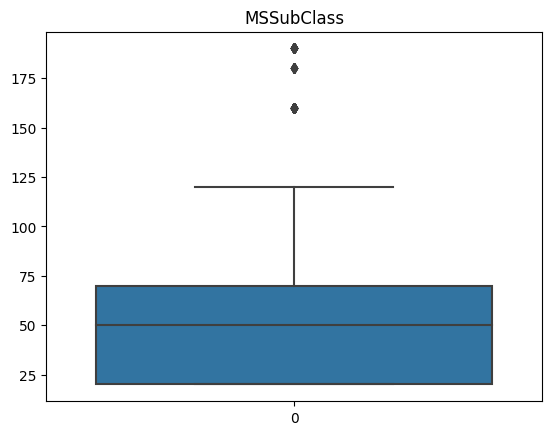

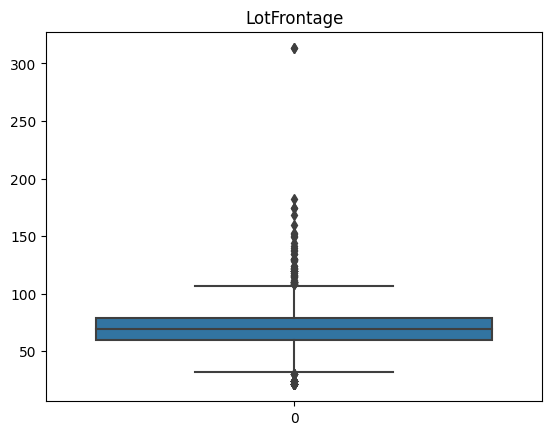

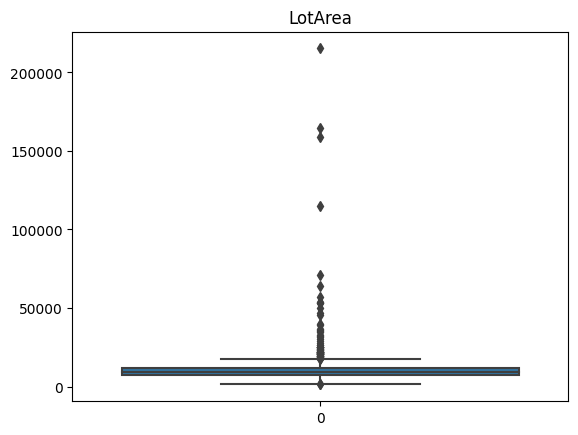

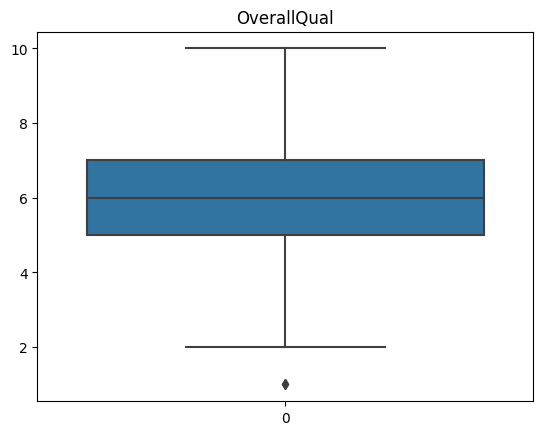

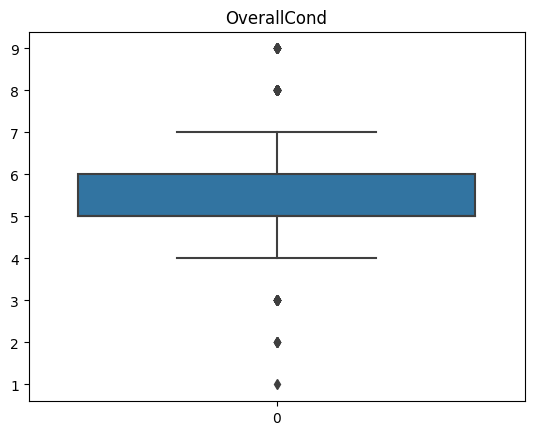

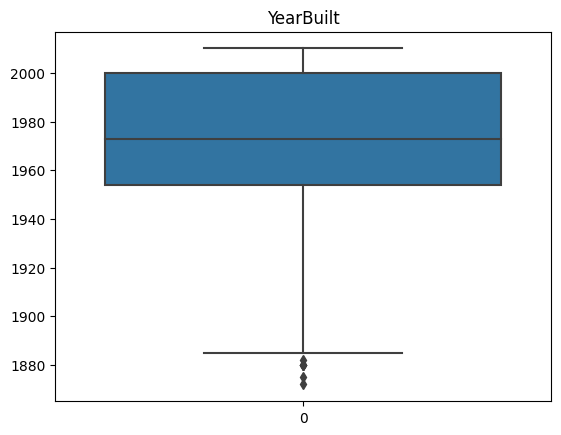

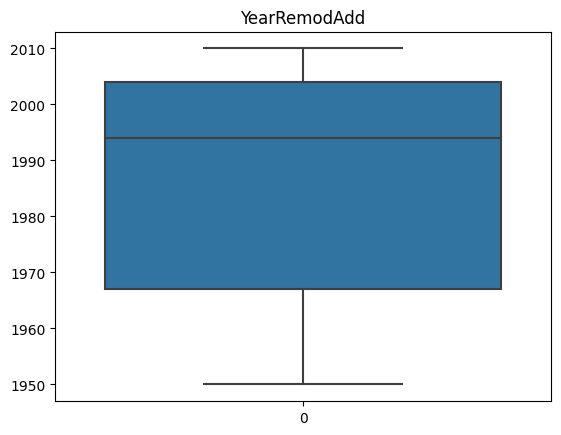

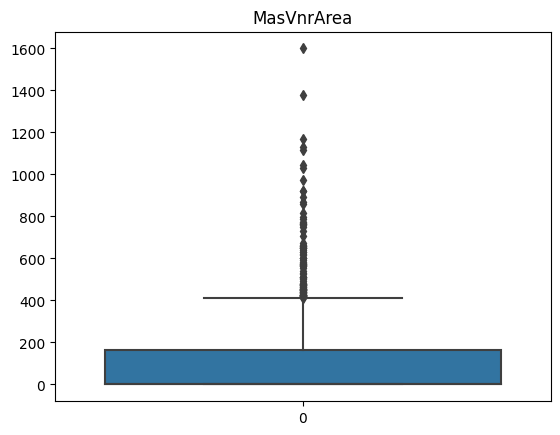

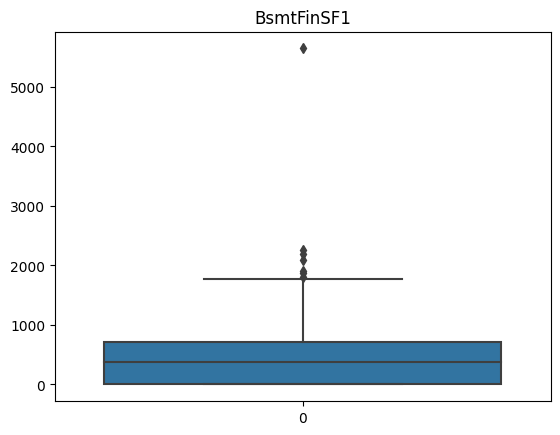

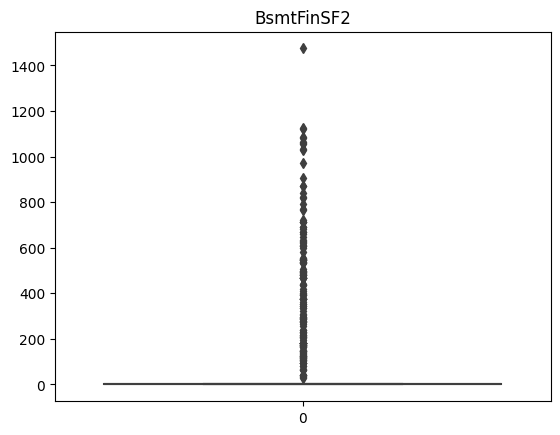

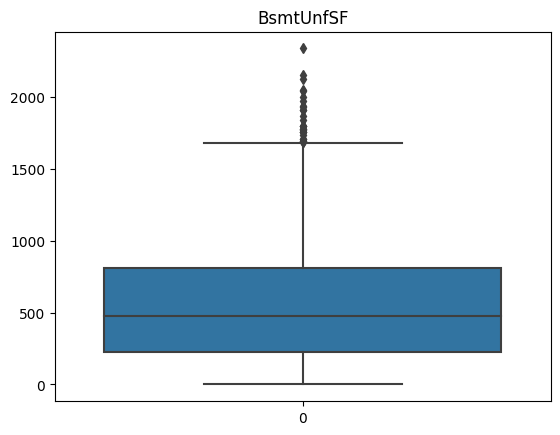

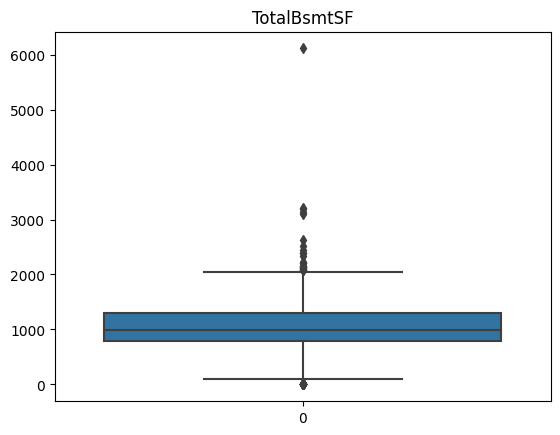

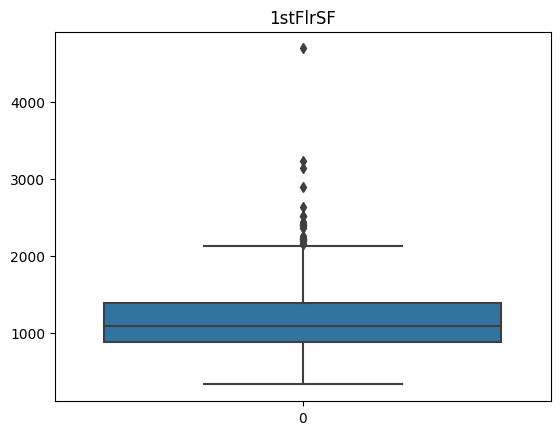

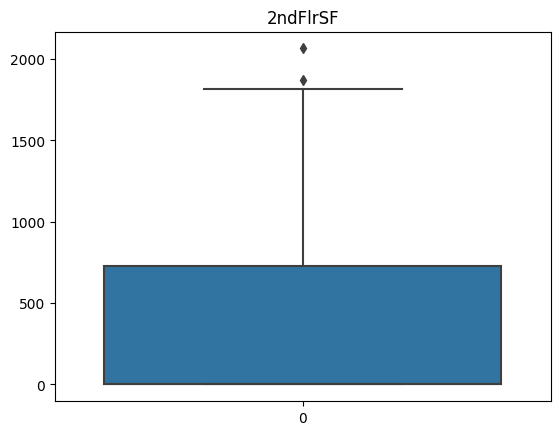

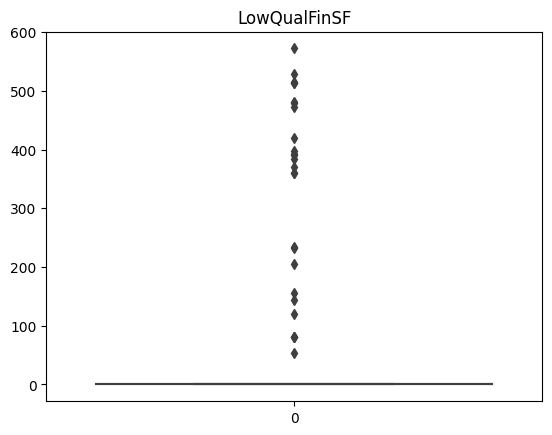

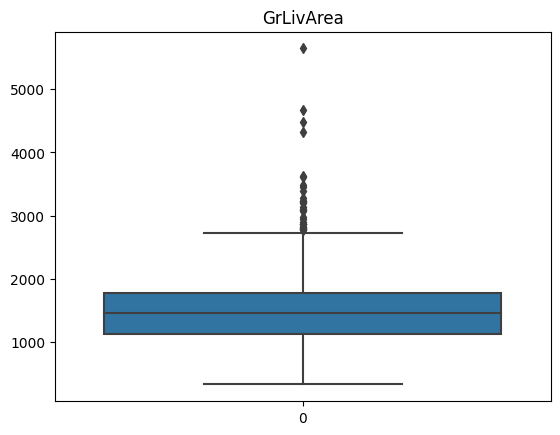

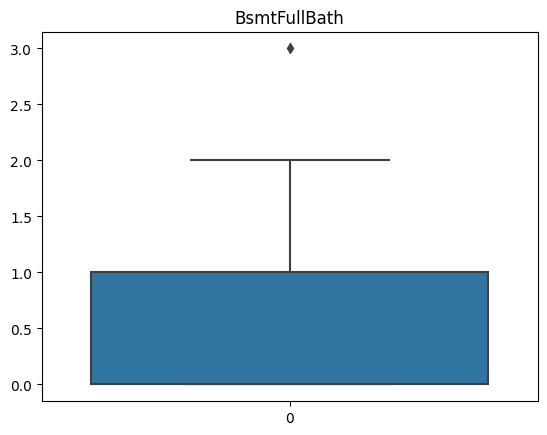

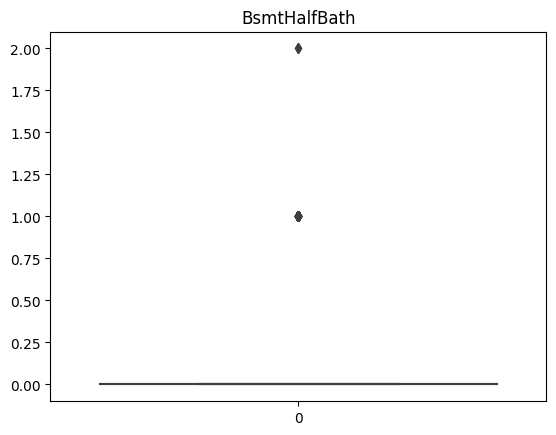

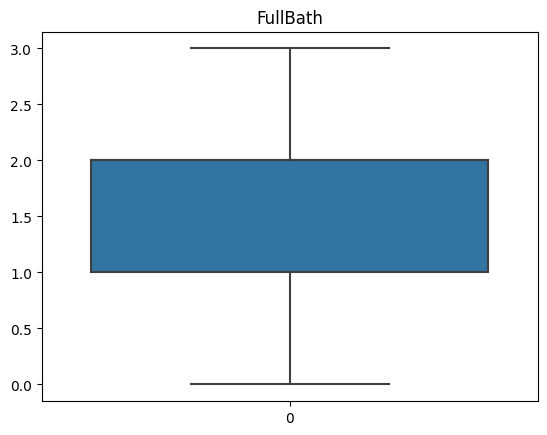

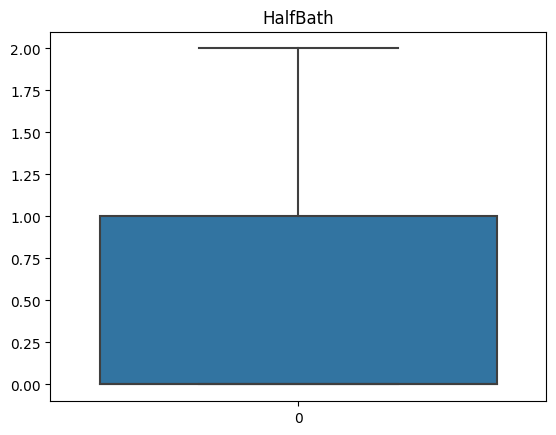

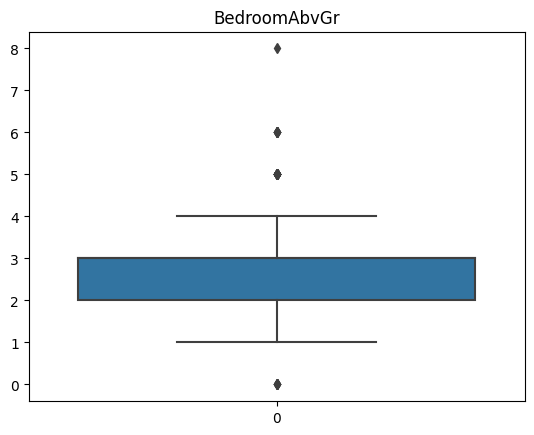

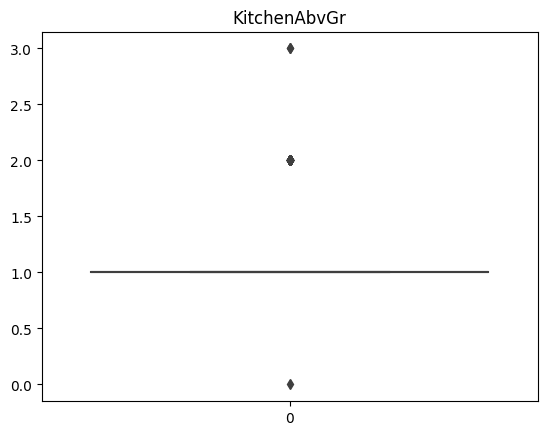

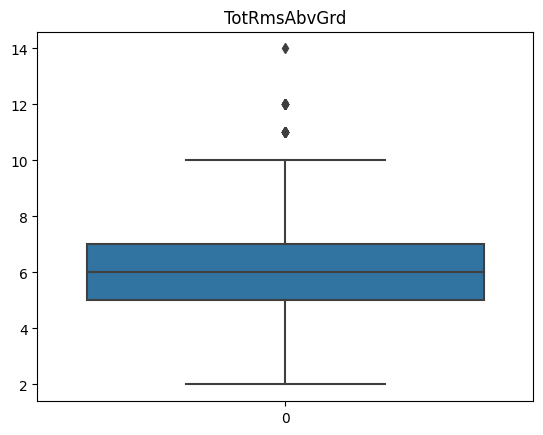

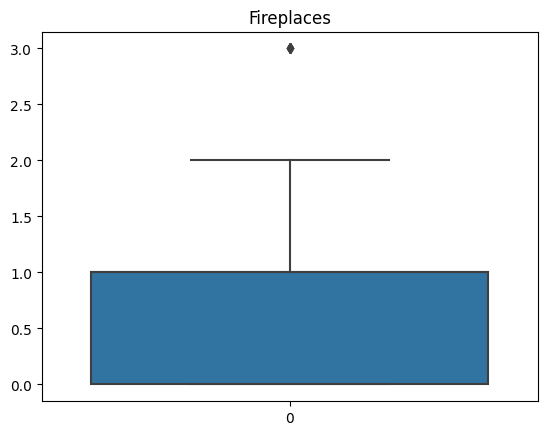

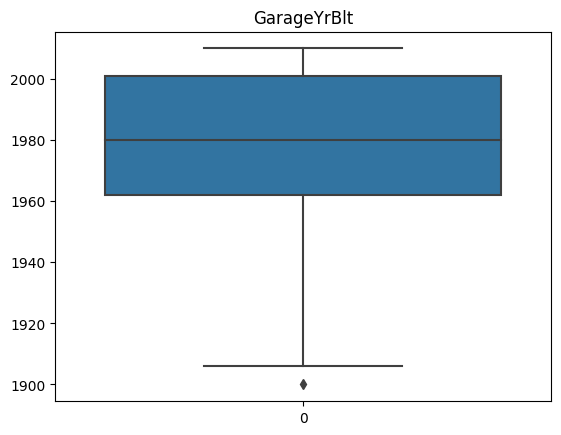

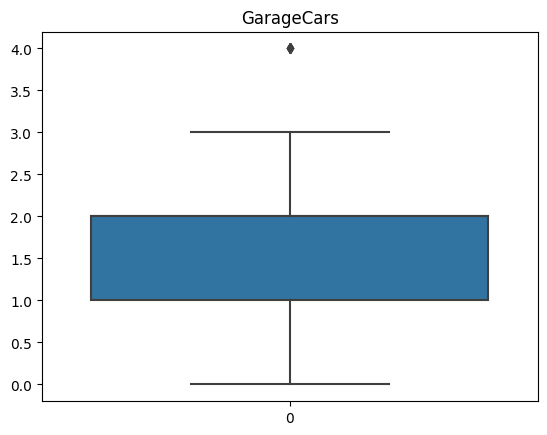

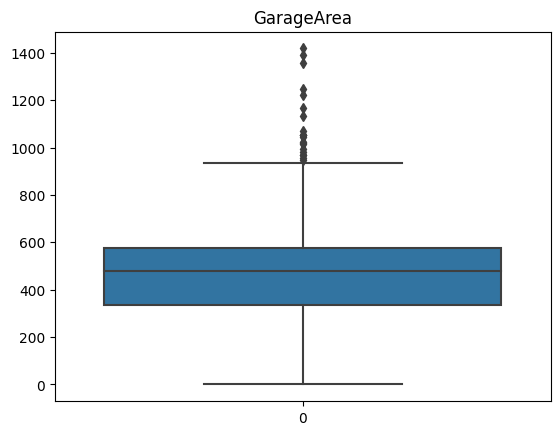

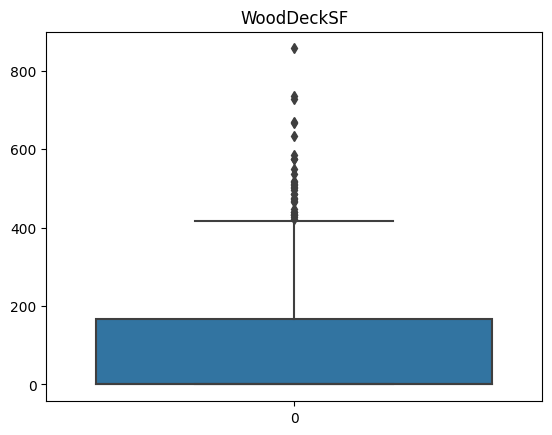

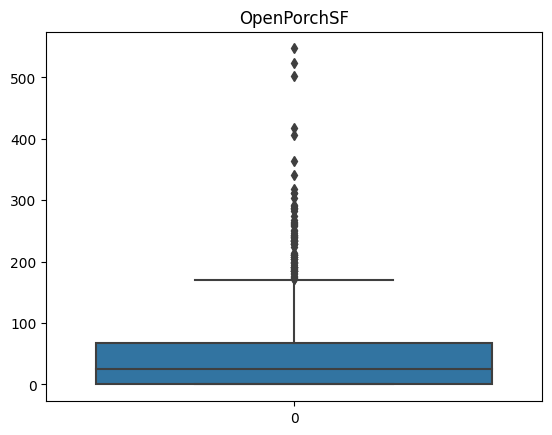

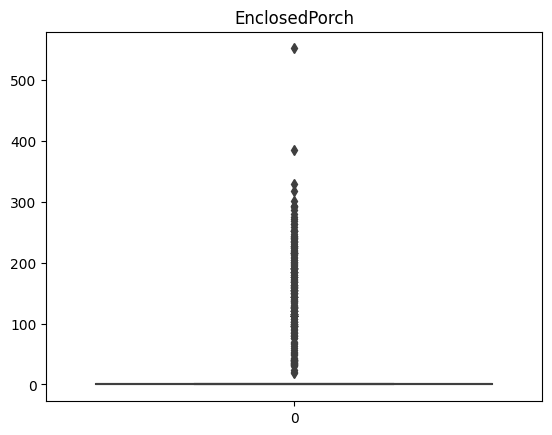

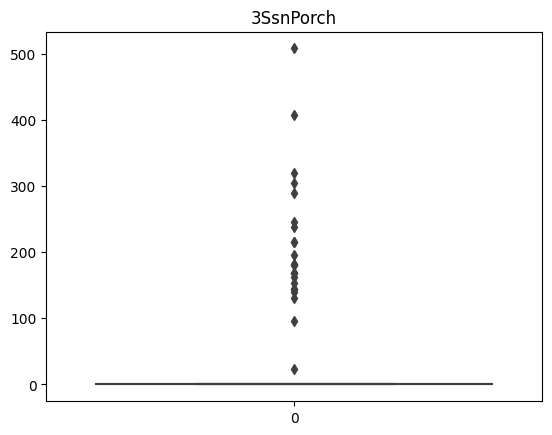

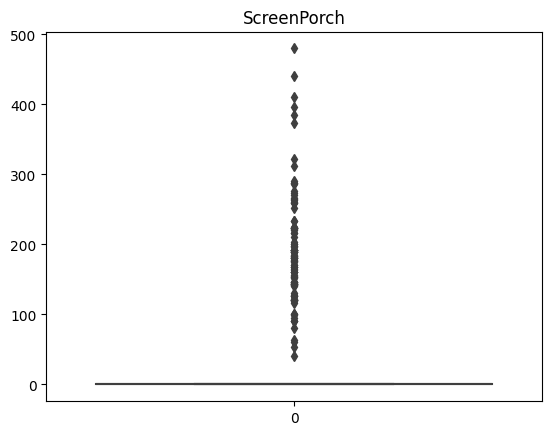

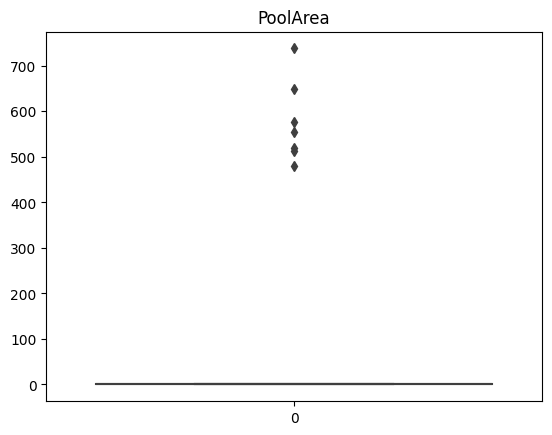

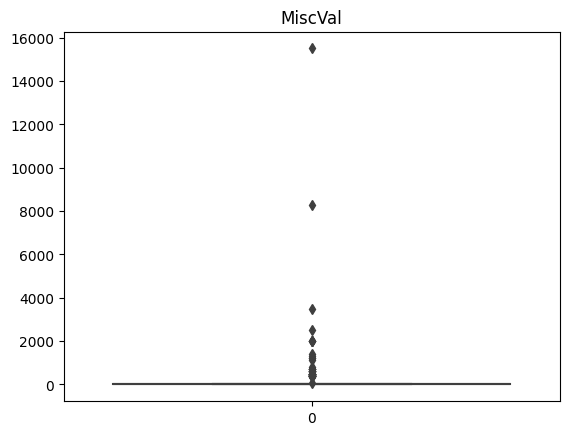

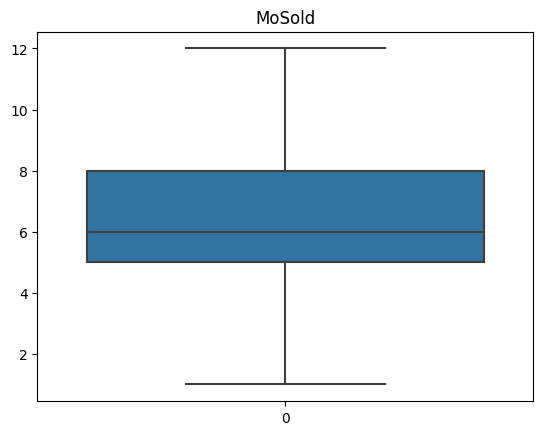

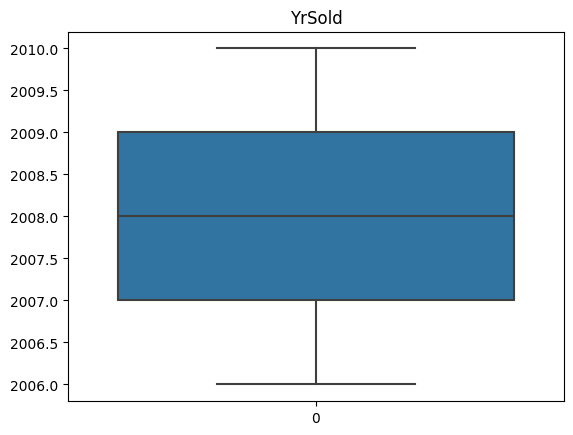

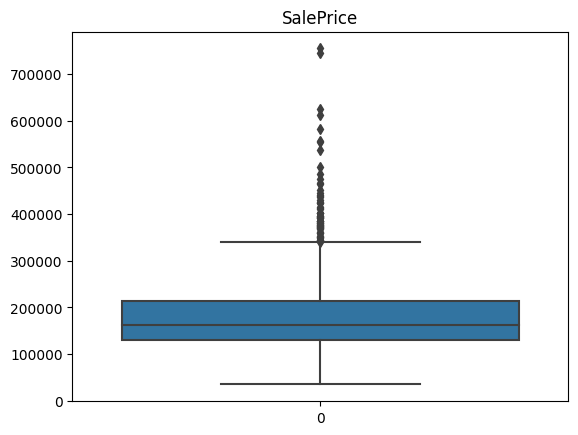

In [17]:
for i in df_n.columns:
    plt.title(i)
    sns.boxplot(df_n[i])
    plt.show()

In [18]:
df_n_d = df_n.filter(["BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageCars","MoSold","OverallQual","OverallCond"],axis=1)
df_n_d

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,OverallQual,OverallCond
0,1,0,2,1,3,1,8,0,2,2,7,5
1,0,1,2,0,3,1,6,1,2,5,6,8
2,1,0,2,1,3,1,6,1,2,9,7,5
3,1,0,1,0,3,1,7,1,3,2,7,5
4,1,0,2,1,4,1,9,1,3,12,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,2,1,3,1,7,1,2,8,6,5
1456,1,0,2,0,3,1,7,2,2,2,6,6
1457,0,0,2,0,4,1,9,2,1,5,7,9
1458,1,0,1,0,2,1,5,0,1,4,5,6


In [19]:
df_nn = df_n.filter(["BsmtFinSF2","LowQualFinSF","MiscVal","PoolArea","ScreenPorch","3SsnPorch","EnclosedPorch"],axis=1)
df_nn

,BsmtFinSF2,LowQualFinSF,MiscVal,PoolArea,ScreenPorch,3SsnPorch,EnclosedPorch
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,272
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
1455,0,0,0,0,0,0,0
1456,163,0,0,0,0,0,0
1457,0,0,2500,0,0,0,0
1458,1029,0,0,0,0,0,112


In [20]:
df_n.drop(["BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageCars","MoSold","OverallQual","OverallCond","BsmtFinSF2","LowQualFinSF","MiscVal","PoolArea","ScreenPorch","3SsnPorch","EnclosedPorch"],axis=1,inplace=True)

In [21]:
df_n

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,YrSold,SalePrice
0,60,65.0,8450,2003,2003,196.0,706,150,856,856,854,1710,2003.0,548,0,61,2008,208500
1,20,80.0,9600,1976,1976,0.0,978,284,1262,1262,0,1262,1976.0,460,298,0,2007,181500
2,60,68.0,11250,2001,2002,162.0,486,434,920,920,866,1786,2001.0,608,0,42,2008,223500
3,70,60.0,9550,1915,1970,0.0,216,540,756,961,756,1717,1998.0,642,0,35,2006,140000
4,60,84.0,14260,2000,2000,350.0,655,490,1145,1145,1053,2198,2000.0,836,192,84,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,1999,2000,0.0,0,953,953,953,694,1647,1999.0,460,0,40,2007,175000
1456,20,85.0,13175,1978,1988,119.0,790,589,1542,2073,0,2073,1978.0,500,349,0,2010,210000
1457,70,66.0,9042,1941,2006,0.0,275,877,1152,1188,1152,2340,1941.0,252,0,60,2010,266500
1458,20,68.0,9717,1950,1996,0.0,49,0,1078,1078,0,1078,1950.0,240,366,0,2010,142125


In [22]:
df_n.isnull().sum().sum()

0

# Using IQR to handle outliers

In [23]:
def wisker(col):
  q1=df_n[col].quantile(0.25)
  q3=df_n[col].quantile(0.75)
  iqr=q3-q1
  lower=q1-(1.5*iqr)
  upper=q3+(1.5*iqr)
  return lower,upper

In [24]:
for i in df_n.columns:
  lower,upper=wisker(i)
  df_n[i]=np.where(df_n[i]<lower,lower,df_n[i])
  df_n[i]=np.where(df_n[i]>upper,upper,df_n[i])

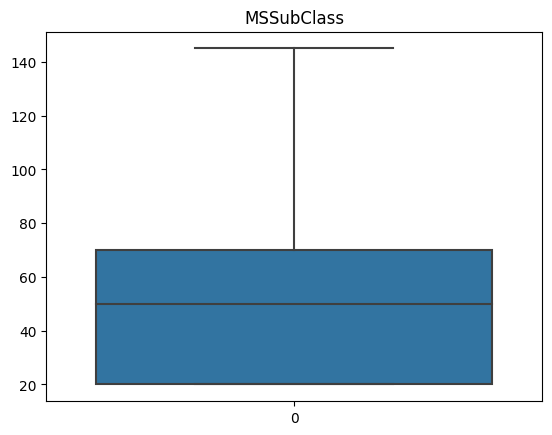

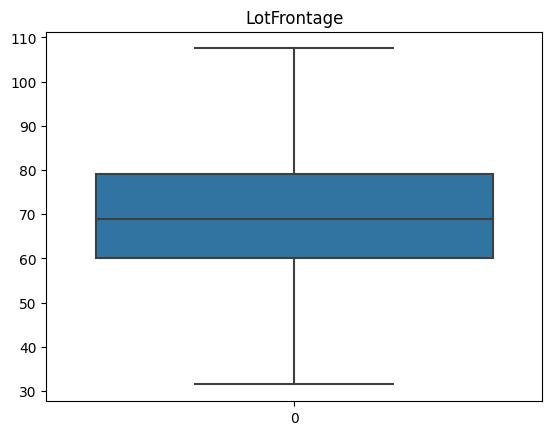

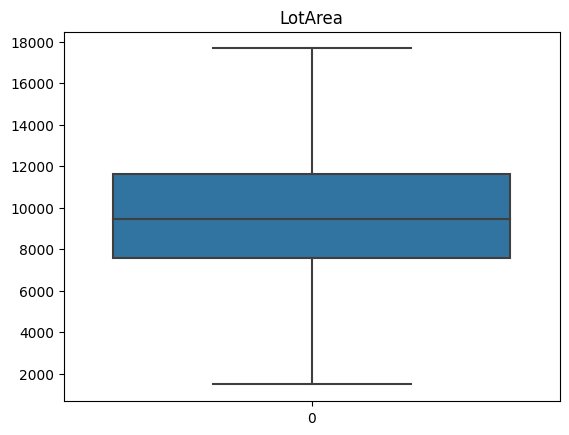

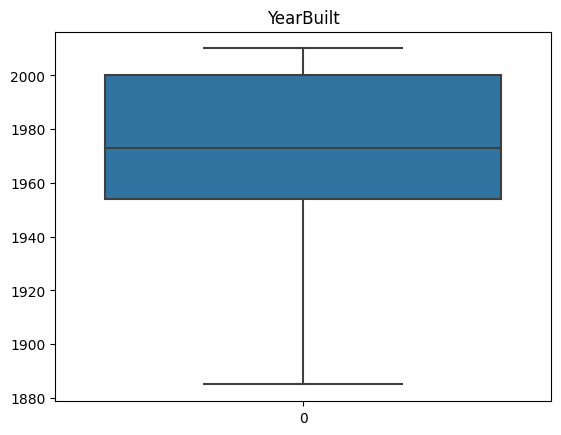

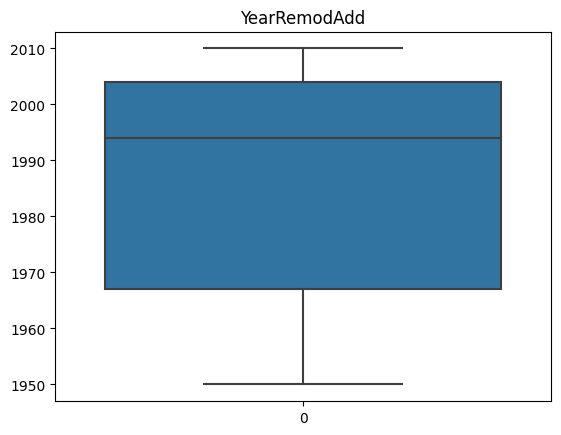

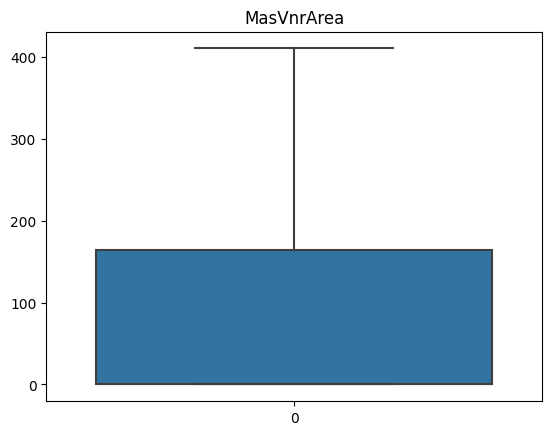

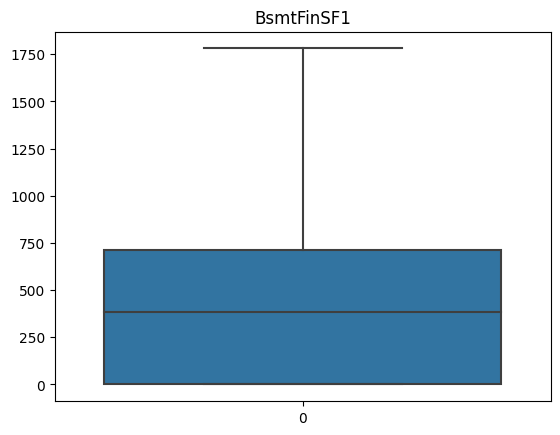

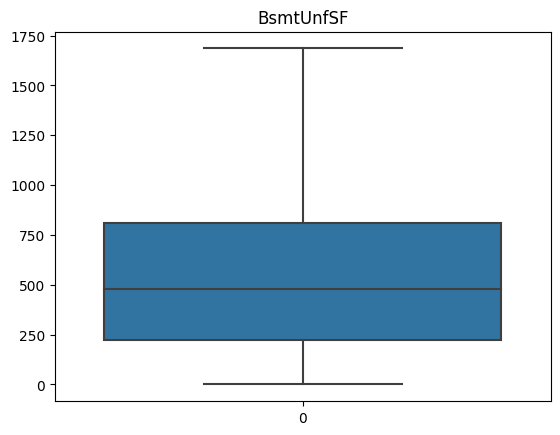

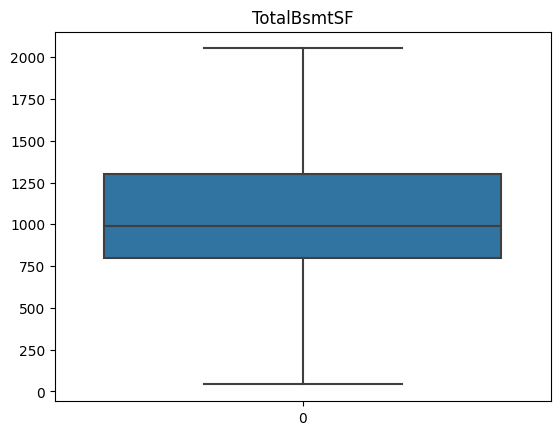

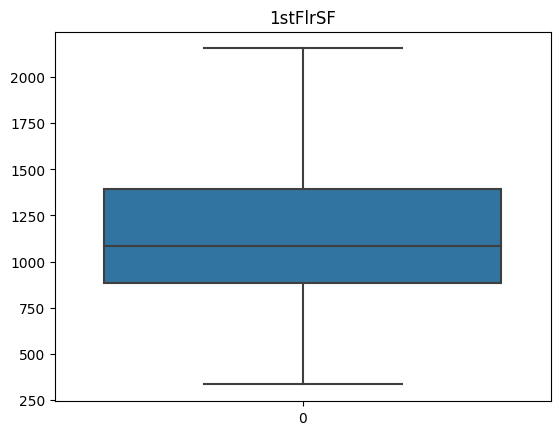

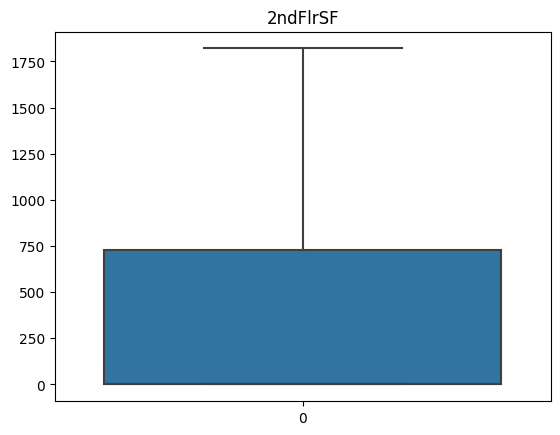

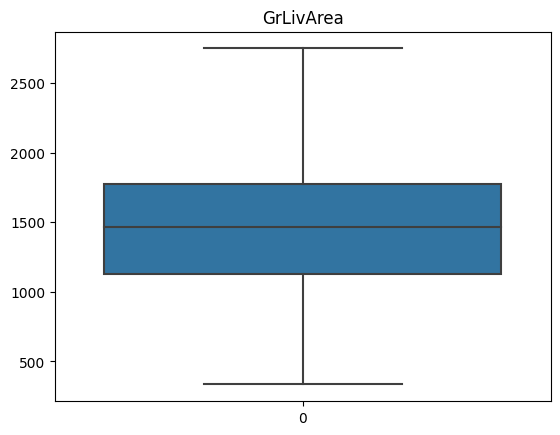

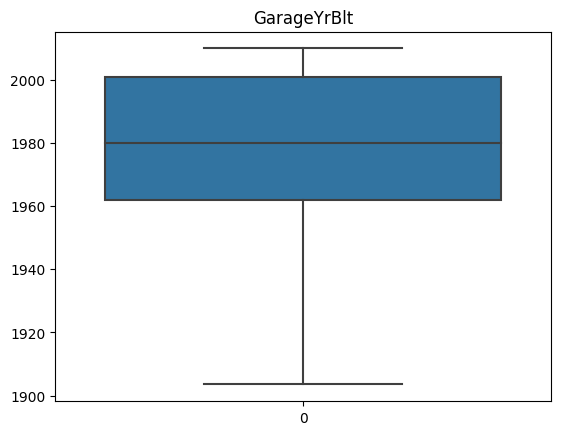

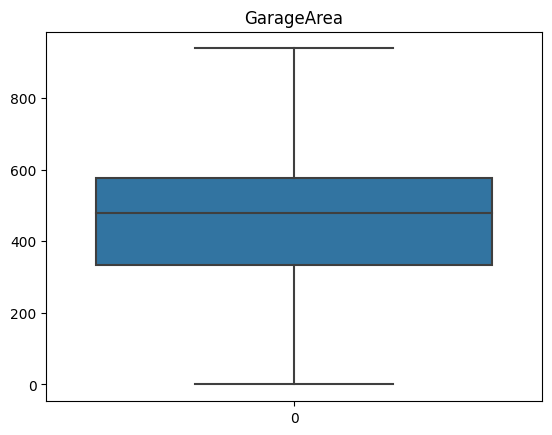

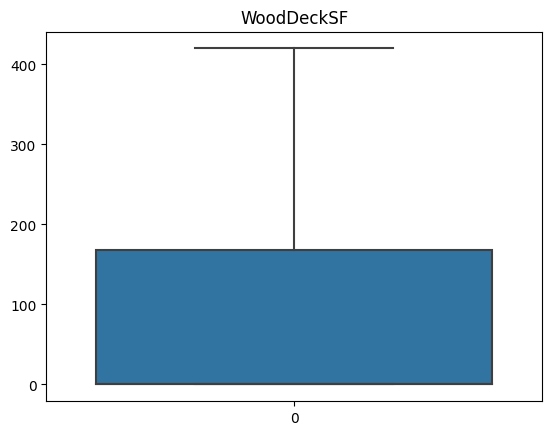

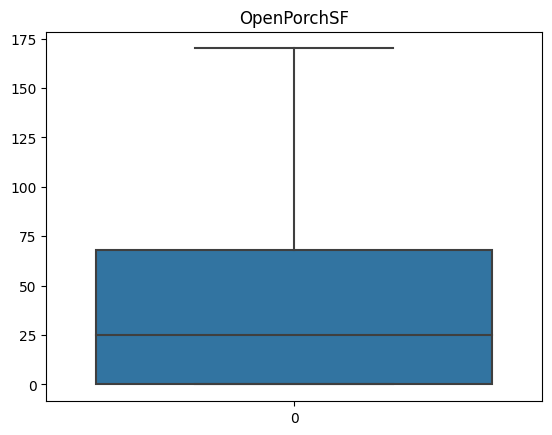

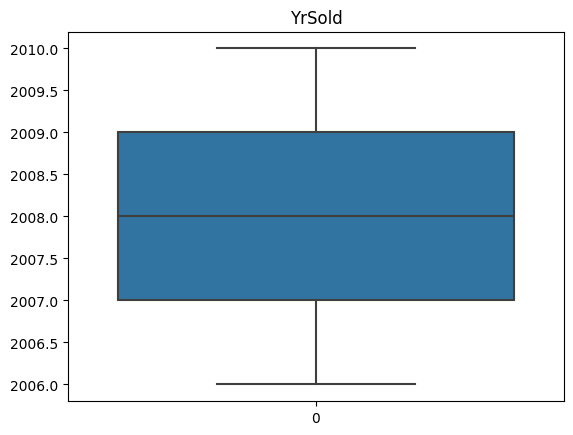

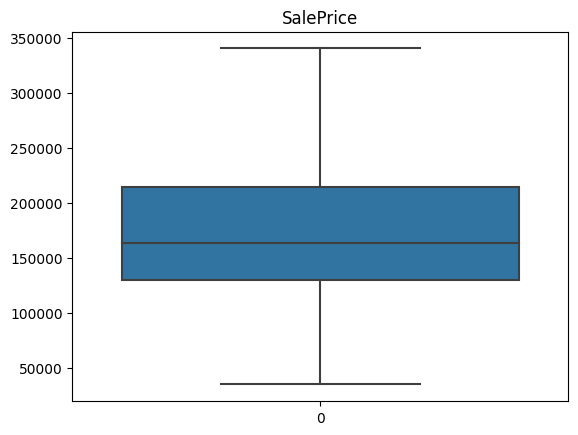

In [25]:
for i in df_n.columns:
    plt.title(i)
    sns.boxplot(df_n[i])
    plt.show()

In [26]:
df_n1 = pd.concat([df_n,df_nn],axis=1)
df_n1

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,OpenPorchSF,YrSold,SalePrice,BsmtFinSF2,LowQualFinSF,MiscVal,PoolArea,ScreenPorch,3SsnPorch,EnclosedPorch
0,60.0,65.0,8450.0,2003.0,2003.0,196.0,706.0,150.0,856.0,856.0,...,61.0,2008.0,208500.0,0,0,0,0,0,0,0
1,20.0,80.0,9600.0,1976.0,1976.0,0.0,978.0,284.0,1262.0,1262.0,...,0.0,2007.0,181500.0,0,0,0,0,0,0,0
2,60.0,68.0,11250.0,2001.0,2002.0,162.0,486.0,434.0,920.0,920.0,...,42.0,2008.0,223500.0,0,0,0,0,0,0,0
3,70.0,60.0,9550.0,1915.0,1970.0,0.0,216.0,540.0,756.0,961.0,...,35.0,2006.0,140000.0,0,0,0,0,0,0,272
4,60.0,84.0,14260.0,2000.0,2000.0,350.0,655.0,490.0,1145.0,1145.0,...,84.0,2008.0,250000.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,62.0,7917.0,1999.0,2000.0,0.0,0.0,953.0,953.0,953.0,...,40.0,2007.0,175000.0,0,0,0,0,0,0,0
1456,20.0,85.0,13175.0,1978.0,1988.0,119.0,790.0,589.0,1542.0,2073.0,...,0.0,2010.0,210000.0,163,0,0,0,0,0,0
1457,70.0,66.0,9042.0,1941.0,2006.0,0.0,275.0,877.0,1152.0,1188.0,...,60.0,2010.0,266500.0,0,0,2500,0,0,0,0
1458,20.0,68.0,9717.0,1950.0,1996.0,0.0,49.0,0.0,1078.0,1078.0,...,0.0,2010.0,142125.0,1029,0,0,0,0,0,112


In [27]:
df_n1.corr()

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,OpenPorchSF,YrSold,SalePrice,BsmtFinSF2,LowQualFinSF,MiscVal,PoolArea,ScreenPorch,3SsnPorch,EnclosedPorch
MSSubClass,1.000000,-0.399010,-0.403395,0.055790,0.058578,0.034657,-0.076423,-0.132790,-0.251190,-0.259517,...,0.001883,-0.021216,-0.061456,-0.069351,0.044201,-0.011390,0.012660,-0.021757,-0.043803,-0.015453
LotFrontage,-0.399010,1.000000,0.579385,0.140115,0.077565,0.210284,0.144167,0.149535,0.336444,0.392061,...,0.147060,0.006479,0.375850,0.050030,0.020707,0.003049,0.074020,0.055528,0.073862,-0.011593
LotArea,-0.403395,0.579385,1.000000,0.065765,0.054472,0.144086,0.215825,0.087068,0.361769,0.458118,...,0.162026,-0.036831,0.435876,0.094716,0.017953,0.056272,0.101145,0.107368,0.069183,-0.006923
YearBuilt,0.055790,0.140115,0.065765,1.000000,0.594909,0.346081,0.252815,0.145236,0.410450,0.288418,...,0.262130,-0.013292,0.570327,-0.049563,-0.183239,-0.034583,0.004893,-0.050805,0.031331,-0.386843
YearRemodAdd,0.058578,0.077565,0.054472,0.594909,1.000000,0.185138,0.126339,0.178277,0.301581,0.246660,...,0.280916,0.035743,0.552061,-0.067759,-0.062419,-0.010286,0.005829,-0.038740,0.045286,-0.193919
MasVnrArea,0.034657,0.210284,0.144086,0.346081,0.185138,1.000000,0.247185,0.108669,0.355451,0.336554,...,0.172885,0.002687,0.450751,-0.074082,-0.080244,-0.032655,-0.000430,0.058447,0.035578,-0.120754
BsmtFinSF1,-0.076423,0.144167,0.215825,0.252815,0.126339,0.247185,1.000000,-0.524935,0.467355,0.395393,...,0.088830,0.013968,0.387586,-0.050337,-0.066898,0.004498,0.068572,0.067568,0.028826,-0.104684
BsmtUnfSF,-0.132790,0.149535,0.087068,0.145236,0.178277,0.108669,-0.524935,1.000000,0.427672,0.317715,...,0.150560,-0.042775,0.216006,-0.211902,0.029794,-0.023694,-0.035367,-0.013514,0.022186,-0.001857
TotalBsmtSF,-0.251190,0.336444,0.361769,0.410450,0.301581,0.355451,0.467355,0.427672,1.000000,0.807158,...,0.249657,-0.018521,0.645251,0.106469,-0.034404,-0.018032,0.048518,0.091102,0.043756,-0.107291
1stFlrSF,-0.259517,0.392061,0.458118,0.288418,0.246660,0.336554,0.395393,0.317715,0.807158,1.000000,...,0.204386,-0.013545,0.621873,0.101232,-0.013323,-0.021136,0.077322,0.096923,0.061603,-0.080555


# Checking for correlation

In [28]:
dfCorr = df_n1.corr()
filteredDf = dfCorr[((dfCorr >= .3) | (dfCorr <= -.3)) & (dfCorr !=1.000)]
print(filteredDf)

               MSSubClass  LotFrontage   LotArea  YearBuilt  YearRemodAdd  \
MSSubClass            NaN    -0.399010 -0.403395        NaN           NaN   
LotFrontage     -0.399010          NaN  0.579385        NaN           NaN   
LotArea         -0.403395     0.579385       NaN        NaN           NaN   
YearBuilt             NaN          NaN       NaN        NaN      0.594909   
YearRemodAdd          NaN          NaN       NaN   0.594909           NaN   
MasVnrArea            NaN          NaN       NaN   0.346081           NaN   
BsmtFinSF1            NaN          NaN       NaN        NaN           NaN   
BsmtUnfSF             NaN          NaN       NaN        NaN           NaN   
TotalBsmtSF           NaN     0.336444  0.361769   0.410450      0.301581   
1stFlrSF              NaN     0.392061  0.458118        NaN           NaN   
2ndFlrSF         0.330582          NaN       NaN        NaN           NaN   
GrLivArea             NaN     0.341141  0.433877        NaN           NaN   

In [29]:
dfCorr = df_n1.corr()
filteredDf = dfCorr[((dfCorr >= .3) | (dfCorr <= -.3)) & (dfCorr !=1.000)]
print(filteredDf)

               MSSubClass  LotFrontage   LotArea  YearBuilt  YearRemodAdd  \
MSSubClass            NaN    -0.399010 -0.403395        NaN           NaN   
LotFrontage     -0.399010          NaN  0.579385        NaN           NaN   
LotArea         -0.403395     0.579385       NaN        NaN           NaN   
YearBuilt             NaN          NaN       NaN        NaN      0.594909   
YearRemodAdd          NaN          NaN       NaN   0.594909           NaN   
MasVnrArea            NaN          NaN       NaN   0.346081           NaN   
BsmtFinSF1            NaN          NaN       NaN        NaN           NaN   
BsmtUnfSF             NaN          NaN       NaN        NaN           NaN   
TotalBsmtSF           NaN     0.336444  0.361769   0.410450      0.301581   
1stFlrSF              NaN     0.392061  0.458118        NaN           NaN   
2ndFlrSF         0.330582          NaN       NaN        NaN           NaN   
GrLivArea             NaN     0.341141  0.433877        NaN           NaN   

In [30]:
T = df_n1.drop(["SalePrice","MSSubClass","BsmtUnfSF","YrSold","BsmtFinSF2","LowQualFinSF","MiscVal","PoolArea","ScreenPorch","3SsnPorch","EnclosedPorch"],axis=1)

In [31]:
T

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF
0,65.0,8450.0,2003.0,2003.0,196.0,706.0,856.0,856.0,854.0,1710.0,2003.0,548.0,0.0,61.0
1,80.0,9600.0,1976.0,1976.0,0.0,978.0,1262.0,1262.0,0.0,1262.0,1976.0,460.0,298.0,0.0
2,68.0,11250.0,2001.0,2002.0,162.0,486.0,920.0,920.0,866.0,1786.0,2001.0,608.0,0.0,42.0
3,60.0,9550.0,1915.0,1970.0,0.0,216.0,756.0,961.0,756.0,1717.0,1998.0,642.0,0.0,35.0
4,84.0,14260.0,2000.0,2000.0,350.0,655.0,1145.0,1145.0,1053.0,2198.0,2000.0,836.0,192.0,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917.0,1999.0,2000.0,0.0,0.0,953.0,953.0,694.0,1647.0,1999.0,460.0,0.0,40.0
1456,85.0,13175.0,1978.0,1988.0,119.0,790.0,1542.0,2073.0,0.0,2073.0,1978.0,500.0,349.0,0.0
1457,66.0,9042.0,1941.0,2006.0,0.0,275.0,1152.0,1188.0,1152.0,2340.0,1941.0,252.0,0.0,60.0
1458,68.0,9717.0,1950.0,1996.0,0.0,49.0,1078.0,1078.0,0.0,1078.0,1950.0,240.0,366.0,0.0


# Checking Correlation between features using VIF

In [32]:
S = sm.add_constant(T)

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = S.columns
vif_data["VIF"] = [variance_inflation_factor(S.values, i) for i in range(S.shape[1])]

print(vif_data)

         feature           VIF
0          const  14589.879470
1    LotFrontage      1.611956
2        LotArea      1.849451
3      YearBuilt      3.086493
4   YearRemodAdd      1.824372
5     MasVnrArea      1.359462
6     BsmtFinSF1      1.359093
7    TotalBsmtSF      3.457070
8       1stFlrSF     21.480808
9       2ndFlrSF     26.222813
10     GrLivArea     34.238515
11   GarageYrBlt      2.976861
12    GarageArea      1.895168
13    WoodDeckSF      1.162414
14   OpenPorchSF      1.229440


In [33]:
#Removing 2ndFlrSF

T1 = T.drop("2ndFlrSF",axis=1)

In [34]:
S1 = sm.add_constant(T1)

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = S1.columns
vif_data["VIF"] = [variance_inflation_factor(S1.values, i) for i in range(S1.shape[1])]

print(vif_data)

         feature           VIF
0          const  14580.398624
1    LotFrontage      1.611769
2        LotArea      1.846327
3      YearBuilt      3.086430
4   YearRemodAdd      1.819254
5     MasVnrArea      1.353680
6     BsmtFinSF1      1.357179
7    TotalBsmtSF      3.454504
8       1stFlrSF      3.576429
9      GrLivArea      1.883518
10   GarageYrBlt      2.973446
11    GarageArea      1.891850
12    WoodDeckSF      1.160077
13   OpenPorchSF      1.228426


In [35]:
T1

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF
0,65.0,8450.0,2003.0,2003.0,196.0,706.0,856.0,856.0,1710.0,2003.0,548.0,0.0,61.0
1,80.0,9600.0,1976.0,1976.0,0.0,978.0,1262.0,1262.0,1262.0,1976.0,460.0,298.0,0.0
2,68.0,11250.0,2001.0,2002.0,162.0,486.0,920.0,920.0,1786.0,2001.0,608.0,0.0,42.0
3,60.0,9550.0,1915.0,1970.0,0.0,216.0,756.0,961.0,1717.0,1998.0,642.0,0.0,35.0
4,84.0,14260.0,2000.0,2000.0,350.0,655.0,1145.0,1145.0,2198.0,2000.0,836.0,192.0,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917.0,1999.0,2000.0,0.0,0.0,953.0,953.0,1647.0,1999.0,460.0,0.0,40.0
1456,85.0,13175.0,1978.0,1988.0,119.0,790.0,1542.0,2073.0,2073.0,1978.0,500.0,349.0,0.0
1457,66.0,9042.0,1941.0,2006.0,0.0,275.0,1152.0,1188.0,2340.0,1941.0,252.0,0.0,60.0
1458,68.0,9717.0,1950.0,1996.0,0.0,49.0,1078.0,1078.0,1078.0,1950.0,240.0,366.0,0.0


In [36]:
df_n_d

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,OverallQual,OverallCond
0,1,0,2,1,3,1,8,0,2,2,7,5
1,0,1,2,0,3,1,6,1,2,5,6,8
2,1,0,2,1,3,1,6,1,2,9,7,5
3,1,0,1,0,3,1,7,1,3,2,7,5
4,1,0,2,1,4,1,9,1,3,12,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,2,1,3,1,7,1,2,8,6,5
1456,1,0,2,0,3,1,7,2,2,2,6,6
1457,0,0,2,0,4,1,9,2,1,5,7,9
1458,1,0,1,0,2,1,5,0,1,4,5,6


# Using Normalization to bring all the features into same scale

In [37]:
MM = MinMaxScaler()
T1[T1.columns] = MM.fit_transform(T1)
T1

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF
0,0.440789,0.430367,0.944,0.883333,0.477321,0.396490,0.404975,0.286636,0.570097,0.934272,0.584066,0.000000,0.358824
1,0.638158,0.501390,0.728,0.433333,0.000000,0.549245,0.606965,0.509575,0.384484,0.680751,0.490274,0.709524,0.000000
2,0.480263,0.603292,0.928,0.866667,0.394521,0.272938,0.436816,0.321779,0.601585,0.915493,0.648015,0.000000,0.247059
3,0.375000,0.498302,0.240,0.333333,0.000000,0.121306,0.355224,0.344293,0.572997,0.887324,0.684253,0.000000,0.205882
4,0.690789,0.789186,0.920,0.833333,0.852359,0.367848,0.548756,0.445329,0.772282,0.906103,0.891021,0.457143,0.494118
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.401316,0.397449,0.912,0.833333,0.000000,0.000000,0.453234,0.339900,0.543995,0.896714,0.490274,0.000000,0.235294
1456,0.703947,0.722178,0.744,0.633333,0.289802,0.443664,0.746269,0.954904,0.720493,0.699531,0.532907,0.830952,0.000000
1457,0.453947,0.466928,0.448,0.933333,0.000000,0.154440,0.552239,0.468941,0.831115,0.352113,0.268585,0.000000,0.352941
1458,0.480263,0.508615,0.520,0.766667,0.000000,0.027518,0.515423,0.408539,0.308250,0.436620,0.255795,0.871429,0.000000


In [38]:
T1.max()

LotFrontage     1.0
LotArea         1.0
YearBuilt       1.0
YearRemodAdd    1.0
MasVnrArea      1.0
BsmtFinSF1      1.0
TotalBsmtSF     1.0
1stFlrSF        1.0
GrLivArea       1.0
GarageYrBlt     1.0
GarageArea      1.0
WoodDeckSF      1.0
OpenPorchSF     1.0
dtype: float64

In [39]:
T1.min()

LotFrontage     0.0
LotArea         0.0
YearBuilt       0.0
YearRemodAdd    0.0
MasVnrArea      0.0
BsmtFinSF1      0.0
TotalBsmtSF     0.0
1stFlrSF        0.0
GrLivArea       0.0
GarageYrBlt     0.0
GarageArea      0.0
WoodDeckSF      0.0
OpenPorchSF     0.0
dtype: float64

In [40]:
df_c

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
2,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
3,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Abnorml
4,RL,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1456,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1457,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,Gd,GdPrv,Shed,WD,Normal
1458,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal


# Handling categorical variables and coverting them into numbers using get dummies

In [41]:
df_c = pd.get_dummies(df_c,drop_first=True)
df_c

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1456,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1457,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1458,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [42]:
df_n_d

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,OverallQual,OverallCond
0,1,0,2,1,3,1,8,0,2,2,7,5
1,0,1,2,0,3,1,6,1,2,5,6,8
2,1,0,2,1,3,1,6,1,2,9,7,5
3,1,0,1,0,3,1,7,1,3,2,7,5
4,1,0,2,1,4,1,9,1,3,12,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,2,1,3,1,7,1,2,8,6,5
1456,1,0,2,0,3,1,7,2,2,2,6,6
1457,0,0,2,0,4,1,9,2,1,5,7,9
1458,1,0,1,0,2,1,5,0,1,4,5,6


In [43]:
df_n_d[df_n_d.columns] = MM.fit_transform(df_n_d)
df_n_d

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,OverallQual,OverallCond
0,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.500000,0.000000,0.50,0.090909,0.666667,0.500
1,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,0.50,0.363636,0.555556,0.875
2,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.333333,0.50,0.727273,0.666667,0.500
3,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.416667,0.333333,0.75,0.090909,0.666667,0.500
4,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.583333,0.333333,0.75,1.000000,0.777778,0.500
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.000000,0.0,0.666667,0.5,0.375,0.333333,0.416667,0.333333,0.50,0.636364,0.555556,0.500
1456,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.416667,0.666667,0.50,0.090909,0.555556,0.625
1457,0.000000,0.0,0.666667,0.0,0.500,0.333333,0.583333,0.666667,0.25,0.363636,0.666667,1.000
1458,0.333333,0.0,0.333333,0.0,0.250,0.333333,0.250000,0.000000,0.25,0.272727,0.444444,0.625


In [44]:
df_n_d.max(),df_n_d.min()

(BsmtFullBath    1.0
 BsmtHalfBath    1.0
 FullBath        1.0
 HalfBath        1.0
 BedroomAbvGr    1.0
 KitchenAbvGr    1.0
 TotRmsAbvGrd    1.0
 Fireplaces      1.0
 GarageCars      1.0
 MoSold          1.0
 OverallQual     1.0
 OverallCond     1.0
 dtype: float64,
 BsmtFullBath    0.0
 BsmtHalfBath    0.0
 FullBath        0.0
 HalfBath        0.0
 BedroomAbvGr    0.0
 KitchenAbvGr    0.0
 TotRmsAbvGrd    0.0
 Fireplaces      0.0
 GarageCars      0.0
 MoSold          0.0
 OverallQual     0.0
 OverallCond     0.0
 dtype: float64)

In [45]:
df_f =  pd.concat([T1,df_n_d,df_c],axis=1)
df_f["OverallQual"]

0       0.666667
1       0.555556
2       0.666667
3       0.666667
4       0.777778
          ...   
1455    0.555556
1456    0.555556
1457    0.666667
1458    0.444444
1459    0.444444
Name: OverallQual, Length: 1460, dtype: float64

# Splitting the data in to X and Y

In [46]:
X = df_f.copy()
X

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.440789,0.430367,0.944,0.883333,0.477321,0.396490,0.404975,0.286636,0.570097,0.934272,...,0,0,0,0,1,0,0,0,1,0
1,0.638158,0.501390,0.728,0.433333,0.000000,0.549245,0.606965,0.509575,0.384484,0.680751,...,0,0,0,0,1,0,0,0,1,0
2,0.480263,0.603292,0.928,0.866667,0.394521,0.272938,0.436816,0.321779,0.601585,0.915493,...,0,0,0,0,1,0,0,0,1,0
3,0.375000,0.498302,0.240,0.333333,0.000000,0.121306,0.355224,0.344293,0.572997,0.887324,...,0,0,0,0,1,0,0,0,0,0
4,0.690789,0.789186,0.920,0.833333,0.852359,0.367848,0.548756,0.445329,0.772282,0.906103,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.401316,0.397449,0.912,0.833333,0.000000,0.000000,0.453234,0.339900,0.543995,0.896714,...,0,0,0,0,1,0,0,0,1,0
1456,0.703947,0.722178,0.744,0.633333,0.289802,0.443664,0.746269,0.954904,0.720493,0.699531,...,0,0,0,0,1,0,0,0,1,0
1457,0.453947,0.466928,0.448,0.933333,0.000000,0.154440,0.552239,0.468941,0.831115,0.352113,...,0,0,0,0,1,0,0,0,1,0
1458,0.480263,0.508615,0.520,0.766667,0.000000,0.027518,0.515423,0.408539,0.308250,0.436620,...,0,0,0,0,1,0,0,0,1,0


In [47]:
Y = df_n1["SalePrice"]
Y

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [48]:
X.isnull().sum().sum()

0

In [49]:
Y.isnull().sum().sum()

0

# Splitting the data in to Training and Test data

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


# Building the linear model with all the features

In [51]:
model = LinearRegression()

# Train the model
model.fit(X_train, Y_train)

LinearRegression()

In [52]:
Y_pred_Training = model.predict(X_train)
Y_pred_Testing = model.predict(X_test)

In [53]:
mse_Training = mean_squared_error(Y_train, Y_pred_Training)
mse_Testing = mean_squared_error(Y_test, Y_pred_Testing)



# Calculate R-squared
r2_Training = r2_score(Y_train,Y_pred_Training)
r2_Testing = r2_score(Y_test,Y_pred_Testing)


print(f'Mean Squared Error for Training data: {mse_Training}')
print(f'R-squared value for Training data: {r2_Training}')

print(f'Mean Squared Error for Testing data: {mse_Testing}')
print(f'R-squared value for Testing data: {r2_Testing}')


Mean Squared Error for Training data: 249005964.42490214
R-squared value for Training data: 0.9439589103537215
Mean Squared Error for Testing data: 8.945227401589273e+31
R-squared value for Testing data: -1.9141271809232755e+22


# Building other models

In [54]:
ridge_model = Ridge(alpha=1.0)

In [70]:
ridge_model.fit(X_train, Y_train)
Y_pred_Train = ridge_model.predict(X_train)
mse_Train = mean_squared_error(Y_train, Y_pred_Train)
r2_Train_ridge = r2_score(Y_train, Y_pred_Train)
Y_pred_Test = ridge_model.predict(X_test)
mse_Test = mean_squared_error(Y_test, Y_pred_Test)
r2_Test_ridge = r2_score(Y_test, Y_pred_Test)
print("MSE of Training data is",mse_Train)
print("R2 Score of Training data is",round(r2_Train_ridge,3))
print("MSE of Test data is",mse_Test)
print("R2 Score of Test data is",round(r2_Test_ridge,3))
# coefficients = ridge_model.coef_
# print(f'Coefficients: {coefficients}')


MSE of Training data is 280272065.13314104
R2 Score of Training data is 0.937
MSE of Test data is 436639240.05278766
R2 Score of Test data is 0.907


In [56]:
lasso_model = Lasso(alpha=1.0)

In [57]:
lasso_model.fit(X_train, Y_train)


Lasso()

In [71]:
Y_pred_Train = lasso_model.predict(X_train)
mse_Train = mean_squared_error(Y_train, Y_pred_Train)
r2_Train_lasso = r2_score(Y_train, Y_pred_Train)
Y_pred_Test = lasso_model.predict(X_test)
mse_Test = mean_squared_error(Y_test, Y_pred_Test)
r2_Test_lasso = r2_score(Y_test, Y_pred_Test)
print("MSE of Training data is",mse_Train)
print("R2 Score of Training data is",round(r2_Train_lasso,3))
print("MSE of Test data is",mse_Test)
print("R2 Score of Test data is",round(r2_Test_lasso,3))
#coefficients = lasso_model.coef_


MSE of Training data is 237059329.8632135
R2 Score of Training data is 0.947
MSE of Test data is 570799227.9701183
R2 Score of Test data is 0.878


In [73]:
RF = RandomForestRegressor(random_state=42,n_estimators=3000)
RF.fit(X_train, Y_train)
Y_pred_Train=RF.predict(X_train)
Y_pred_Test=RF.predict(X_test)
r2_Train_RF = np.round(r2_score(Y_train,Y_pred_Train),3)
r2_Test_RF = np.round(r2_score(Y_test,Y_pred_Test),3)
print("MSE of Test data is : ",np.round(mean_squared_error(Y_test,Y_pred_Test),3))
print("R2 score of Test data is : ",np.round(r2_score(Y_test,Y_pred_Test),3))

MSE of Test data is :  399566644.482
R2 score of Test data is :  0.914


In [75]:
modelgb = GradientBoostingRegressor(random_state=42,learning_rate=0.1,n_estimators=3000)
modelgb.fit(X_train, Y_train)
Y_pred_Train=modelgb.predict(X_train)
Y_pred_Test=modelgb.predict(X_test)
r2_Train_GB = np.round(r2_score(Y_train,Y_pred_Train),3)
r2_Test_GB = np.round(r2_score(Y_test,Y_pred_Test),3)
print("MSE of Test data is : ",np.round(mean_squared_error(Y_test,Y_pred_Test),3))
print("R2 score of Test data is : ",np.round(r2_score(Y_test,Y_pred_Test),3))

MSE of Test data is :  391729567.195
R2 score of Test data is :  0.916


In [76]:
modelada = AdaBoostRegressor(random_state=42,learning_rate=0.1,n_estimators=3000,loss='linear')
modelada.fit(X_train, Y_train)
Y_pred_Train=modelada.predict(X_train)
Y_pred_Test=modelada.predict(X_test)
r2_Train_ADA = np.round(r2_score(Y_train,Y_pred_Train),3)
r2_Test_ADA = np.round(r2_score(Y_test,Y_pred_Test),3)
print("MSE of Test data is : ",np.round(mean_squared_error(Y_test,Y_pred_Test),3))
print("R2 score of Test data is : ",np.round(r2_score(Y_test,Y_pred_Test),3))

MSE of Test data is :  669001726.471
R2 score of Test data is :  0.857


In [62]:
pd.options.display.min_rows = 200

from sklearn.feature_selection import mutual_info_regression
df_c_Train,df_c_Test,Y_Train,Y_Test = train_test_split(df_c,Y,test_size=0.3,random_state=43)
mi = mutual_info_regression(df_c_Train, Y_Train)

# Create a DataFrame to view the scores
mi_df = pd.DataFrame({'Feature': df_c.columns, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)
mi_df.head(100)

,Feature,Mutual Information
115,ExterQual_TA,0.243031
114,ExterQual_Gd,0.216648
177,GarageFinish_Unf,0.206671
160,KitchenQual_TA,0.202113
127,BsmtQual_TA,0.201637
121,Foundation_PConc,0.178968
126,BsmtQual_Gd,0.166075
159,KitchenQual_Gd,0.156964
175,GarageType_Detchd,0.114321
120,Foundation_CBlock,0.103443


In [63]:
df_c1 = df_c.filter(['ExterQual_TA','ExterQual_Gd','KitchenQual_TA','BsmtQual_TA','GarageFinish_Unf','Foundation_PConc','KitchenQual_Gd','BsmtQual_Gd','Exterior2nd_VinylSd','Foundation_CBlock','GarageType_Detchd','Neighborhood_NridgHt'],axis=1)
df_c1

,ExterQual_TA,ExterQual_Gd,KitchenQual_TA,BsmtQual_TA,GarageFinish_Unf,Foundation_PConc,KitchenQual_Gd,BsmtQual_Gd,Exterior2nd_VinylSd,Foundation_CBlock,GarageType_Detchd,Neighborhood_NridgHt
0,0,1,0,0,0,1,1,1,1,0,0,0
1,1,0,1,0,0,0,0,1,0,1,0,0
2,0,1,0,0,0,1,1,1,1,0,0,0
3,1,0,0,1,1,0,1,0,0,0,1,0
4,0,1,0,0,0,1,1,1,1,0,0,0
5,1,0,1,0,1,0,0,1,1,0,0,0
6,0,1,0,0,0,1,1,0,1,0,0,0
7,1,0,1,0,0,0,0,1,0,1,0,0
8,1,0,1,1,1,0,0,0,0,0,1,0
9,1,0,1,1,0,0,0,0,0,0,0,0


# Lets do linear regression with selected features now


df_flinear =  pd.concat([T1,df_n_d,df_c1],axis=1)
df_flinear

In [65]:
X1 = df_flinear.copy()

In [66]:
X1

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,...,KitchenQual_TA,BsmtQual_TA,GarageFinish_Unf,Foundation_PConc,KitchenQual_Gd,BsmtQual_Gd,Exterior2nd_VinylSd,Foundation_CBlock,GarageType_Detchd,Neighborhood_NridgHt
0,0.440789,0.430367,0.944,0.883333,0.477321,0.396490,0.404975,0.286636,0.570097,0.934272,...,0,0,0,1,1,1,1,0,0,0
1,0.638158,0.501390,0.728,0.433333,0.000000,0.549245,0.606965,0.509575,0.384484,0.680751,...,1,0,0,0,0,1,0,1,0,0
2,0.480263,0.603292,0.928,0.866667,0.394521,0.272938,0.436816,0.321779,0.601585,0.915493,...,0,0,0,1,1,1,1,0,0,0
3,0.375000,0.498302,0.240,0.333333,0.000000,0.121306,0.355224,0.344293,0.572997,0.887324,...,0,1,1,0,1,0,0,0,1,0
4,0.690789,0.789186,0.920,0.833333,0.852359,0.367848,0.548756,0.445329,0.772282,0.906103,...,0,0,0,1,1,1,1,0,0,0
5,0.703947,0.780231,0.864,0.750000,0.000000,0.411092,0.375124,0.253689,0.425915,0.840376,...,1,0,1,0,0,1,1,0,0,0
6,0.572368,0.531281,0.952,0.916667,0.452968,0.768831,0.817910,0.746791,0.563468,0.943662,...,0,0,0,1,1,0,1,0,0,0
7,0.493421,0.549685,0.704,0.383333,0.584475,0.482415,0.529851,0.424463,0.727536,0.652582,...,1,0,0,0,0,1,0,1,0,0
8,0.256579,0.286469,0.368,0.000000,0.000000,0.000000,0.452736,0.377788,0.596613,0.258216,...,1,1,1,0,0,0,0,0,1,0
9,0.243421,0.366755,0.432,0.000000,0.000000,0.477922,0.472139,0.407990,0.307836,0.333333,...,1,1,0,0,0,0,0,0,0,0


In [67]:
modellinear = LinearRegression()

X1_Train,X1_Test,Y_Train,Y_Test = train_test_split(X1,Y,test_size=0.3,random_state=43)


# Train the model
modellinear.fit(X1_Train, Y_Train)
Y_pred_Training = modellinear.predict(X1_Train)
Y_pred_Testing = modellinear.predict(X1_Test)

In [68]:
mse_Training = mean_squared_error(Y_Train, Y_pred_Training)
mse_Testing = mean_squared_error(Y_Test, Y_pred_Testing)



# Calculate R-squared
r2_Training = r2_score(Y_Train,Y_pred_Training)
r2_Testing = r2_score(Y_Test,Y_pred_Testing)


print(f'Mean Squared Error for Training data: {mse_Training}')
print(f'R-squared value for Training data: {r2_Training}')

print(f'Mean Squared Error for Testing data: {mse_Testing}')
print(f'R-squared value for Testing data: {r2_Testing}')


Mean Squared Error for Training data: 470899995.2090207
R-squared value for Training data: 0.8915347451293818
Mean Squared Error for Testing data: 563847363.9513705
R-squared value for Testing data: 0.885275678914895


# Using kfold cross validation to check the model performance

In [69]:
kfold = KFold(n_splits=4)


R2Score_training = []
R2Score_test = []
for train_index, test_index in kfold.split(X1):
    X_Train = X1.iloc[train_index]
    X_Test = X1.iloc[test_index]
    Y_Train = Y.iloc[train_index]
    Y_Test = Y.iloc[test_index]
    modellinear.fit(X_Train,Y_Train)
    Y_pred_training = modellinear.predict(X_Train)
    Y_pred_test = modellinear.predict(X_Test)
    R2Score_training.append(r2_score(Y_Train,Y_pred_training))
    R2Score_test.append(r2_score(Y_Test,Y_pred_test))

    


print("R2Score of Training data is ",np.mean(R2Score_training))
print("R2Score of Test data is ",np.mean(R2Score_test))


R2Score of Training data is  0.8925501760200802
R2Score of Test data is  0.8841805518459599


# Preparing dataframe with all the built models along with their performances

In [85]:
data = {
    'Models': ['modellinear','ridge_model','lasso_model','RF','modelgb','modelada'],
    'TrainingR2Score': [r2_Training,r2_Train_ridge,r2_Train_lasso,r2_Train_RF,r2_Train_GB,r2_Train_ADA],
    'TestingR2Score': [r2_Testing,r2_Test_ridge,r2_Test_lasso,r2_Test_RF,r2_Test_GB,r2_Test_ADA]

}

# Convert the dictionary to a DataFrame
dfdata = pd.DataFrame(data)
dfdata_sorted = dfdata.sort_values(by='TestingR2Score', ascending=False)
print(dfdata_sorted)

        Models  TrainingR2Score  TestingR2Score
4      modelgb         1.000000        0.916000
3           RF         0.983000        0.914000
1  ridge_model         0.936922        0.906567
0  modellinear         0.891535        0.885276
2  lasso_model         0.946648        0.877859
5     modelada         0.878000        0.857000
